In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
#Linear Regression Model
class Linear_Regression():
    def __init__(self, lr, iterations):
        self.Learning_rate = lr
        self.Iterations = iterations

    # Fit the model to the data
    def fit(self, X, y):
        self.samples, self.features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(self.features)
        self.bias = 0
        #Save the data for later use
        self.X = X
        self.Y = y
        # Gradient Descent
        for _ in range(self.Iterations):
            self.update_weights()
        # Return the model
        return self
    
    # Update weights and bias using gradient descent
    def update_weights(self):
        y_pred = self.predict(self.X)
        # Calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - y_pred)) / self.samples
        db = - (2 * np.sum(self.Y - y_pred)) / self.samples

        # Update weights and bias
        self.weights -= self.Learning_rate * dw
        self.bias -= self.Learning_rate * db
    
    # Make predictions using the model
    def predict(self, X):
        return X.dot(self.weights) + self.bias


In [20]:
def main():
    # Load the dataset
    df = pd.read_csv(r"C:\Users\garv\OneDrive\Desktop\UNITY\Machine Learning\Datasets\salary_data.csv")

    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values  # Target variable

    # Normalize X
    X = (X - np.mean(X)) / np.std(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = Linear_Regression(lr=0.0001, iterations=100000)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate Mean Squared Error
    MSE =  np.mean((predictions - y_test) ** 2) / X_train.shape[0]
    
    # Print some results
    print("Predicted values ", np.round(predictions[:], 2))
    print("Real values     ", y_test[:])
    print("Trained W       ", round(model.weights[0], 2))
    print("Trained b       ", round(model.bias, 2))
    print("Mean Squared Error: ", round(MSE, 2))

    # Visualization
    plt.scatter(X_test, y_test, color='blue')  # Plot actual salaries
    plt.plot(X_test, predictions, color='orange')  # Plot regression line
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()


Predicted values  [ 58272.96  77655.5   92192.41  97038.04  82501.14  87346.77  53427.33
 106729.31  43736.06  63118.6 ]
Real values      [ 58208.38  66862.16  94506.98  95441.21  83303.94  84301.2   53589.95
 116381.2   41020.87  67527.73]
Trained W        26653.81
Trained b        77364.76
Mean Squared Error:  635814.15


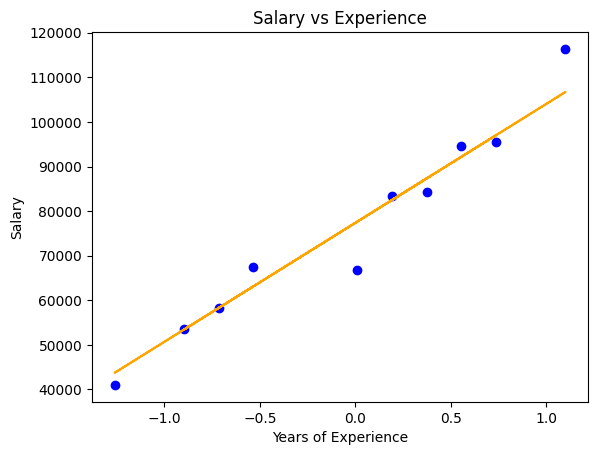

In [21]:
if __name__ == "__main__":
    main()